In [1]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Add matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

june_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date) ==6).all()

In [5]:
# 2. Convert the June temperatures to a list.
june_temps = list((june_results))

In [6]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
june_results_df = pd. DataFrame(june_temps,columns = ['date','june_temps'])
june_results_df.set_index(june_results_df['date'], inplace=True)

In [7]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_results_df.describe()

,june_temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [8]:
# 5. Return to your challenge instructions to compare your summary statistics

## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date) ==12).all()

In [10]:
# 7. Convert the December temperatures to a list.
dec_temps = list((dec_results))

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_results_df = pd. DataFrame(dec_temps,columns = ['date','dec_temps'])
dec_results_df.set_index(dec_results_df['date'], inplace=True)

In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_results_df.describe()

,dec_temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [13]:
# 10. Return to your challenge instructions to compare your summary statistics

In [14]:
########## D3: key differences in weather between June and December ########

In [63]:
## query for June Precipitation

june_prcp_temp = session.query(Measurement.date,Measurement.prcp,Measurement.tobs).\
    filter(extract('month',Measurement.date) ==6).all()

junePT = list((june_prcp_temp))
june_prcp_temp_df=pd.DataFrame(junePT,columns=['date','June precip','june_temps'])
june_prcp_temp_df.set_index(june_prcp_temp_df['date'], inplace=True)


In [64]:
june_prcp_temp_df.describe()

,June precip,june_temps
count,1574.000000,1700.000000
mean,0.136360,74.944118
std,0.335731,3.257417
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


Text(0.5, 1.0, 'June Precipitation')

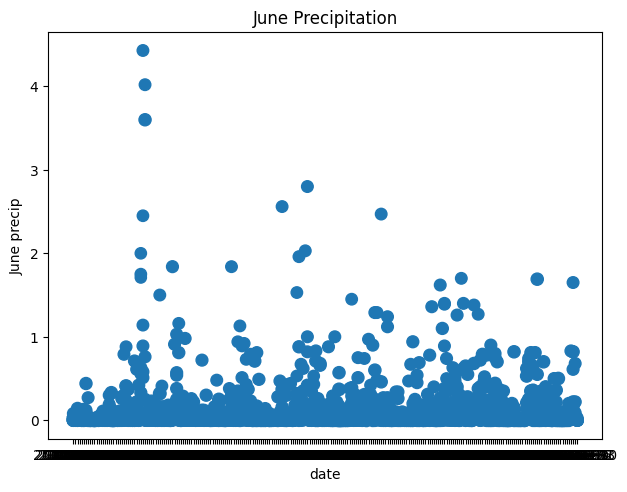

In [70]:
## plot 


june_prcp_temp_df.plot.scatter('date','June precip','june_temps')
plt.tight_layout()
plt.title('June Precipitation')



In [71]:
## query for December precipiation


dec_prcp_temp = session.query(Measurement.date,Measurement.prcp,Measurement.tobs).\
    filter(extract('month',Measurement.date) ==12).all()

decPT = list((dec_prcp_temp))
dec_prcp_temp_df=pd.DataFrame(decPT,columns=['date','december precip','dec_temps'])
dec_prcp_temp_df.set_index(dec_prcp_temp_df['date'], inplace=True)

In [72]:
dec_prcp_temp_df.describe()

,december precip,dec_temps
count,1405.000000,1517.000000
mean,0.216819,71.041529
std,0.541399,3.745920
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,83.000000


Text(0.5, 1.0, 'December Precipitation')

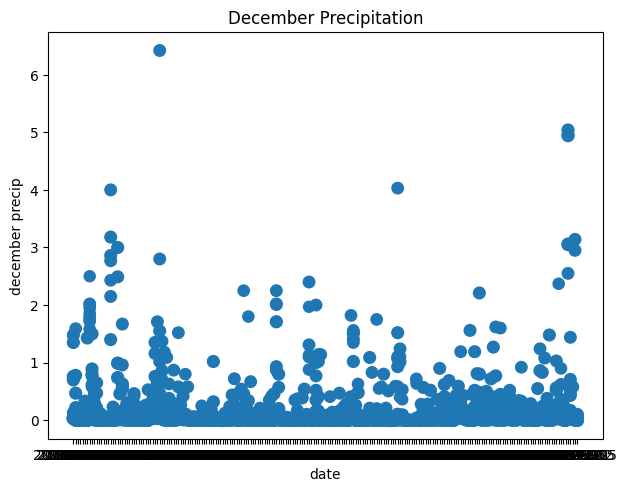

In [73]:

dec_prcp_temp_df.plot.scatter('date','december precip','dec_temps')
plt.tight_layout()
plt.title('December Precipitation')


In [76]:
june_stats = june_prcp_temp_df.describe()
dec_stats = dec_prcp_temp_df.describe()

summary_df =june_stats.merge(dec_stats, left_index = True, right_index = True)

In [77]:
summary_df.describe()

,June precip,june_temps,december precip,dec_temps
count,8.000000,8.000000,8.000000,8.000000
mean,197.380261,269.025192,176.544777,243.098431
std,556.240445,578.771458,496.375738,515.319340
min,0.000000,3.257417,0.000000,3.745920
25%,0.015000,70.750000,0.022500,65.750000
50%,0.128180,74.972059,0.183409,71.020765
75%,1.359298,79.000000,2.011050,76.250000
max,1574.000000,1700.000000,1405.000000,1517.000000


In [84]:
june_station = session.query(Measurement.tobs,Measurement.station).filter(extract('month',Measurement.date) ==6).all()

june_station_df=pd.DataFrame(june_station,columns=['june_temps','station'])
june_station_df

,june_temps,station
0,78.0,USC00519397
1,76.0,USC00519397
2,78.0,USC00519397
3,76.0,USC00519397
4,77.0,USC00519397
...,...,...
1695,79.0,USC00516128
1696,74.0,USC00516128
1697,74.0,USC00516128
1698,76.0,USC00516128


In [85]:
dec_station = session.query(Measurement.tobs,Measurement.station).filter(extract('month',Measurement.date) ==12).all()
dec_station_df=pd.DataFrame(june_station,columns=['dec_temps','station'])
dec_station_df

,dec_temps,station
0,78.0,USC00519397
1,76.0,USC00519397
2,78.0,USC00519397
3,76.0,USC00519397
4,77.0,USC00519397
...,...,...
1695,79.0,USC00516128
1696,74.0,USC00516128
1697,74.0,USC00516128
1698,76.0,USC00516128


In [87]:
station_temps = june_station_df.merge(dec_station_df, on = "station", how = "inner").set_index("station")
station_temps

,june_temps,dec_temps
station,,
USC00519397,78.0,78.0
USC00519397,78.0,76.0
USC00519397,78.0,78.0
USC00519397,78.0,76.0
USC00519397,78.0,77.0
...,...,...
USC00516128,75.0,79.0
USC00516128,75.0,74.0
USC00516128,75.0,74.0
